## Importing Package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
DATADIR = "C:/Users/mehul/Documents/Python Scripts/image processing project/data"
CATEGORIES = ["with_mask","without_mask"]

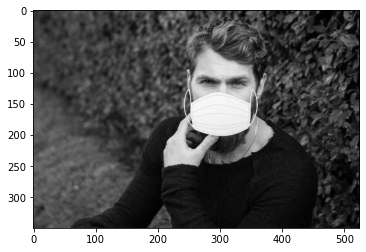

In [3]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break  

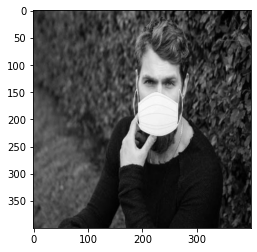

In [4]:
IMG_SIZE = 400

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

In [6]:
print(len(training_data))

7553


In [7]:
import random

random.shuffle(training_data)

In [8]:
X = []
y = []
for features, labels in training_data:
    X.append(features)
    y.append(labels)

x = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [9]:
x.shape

(7553, 400, 400, 1)

In [10]:
y.shape

(7553,)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

In [12]:
x = x/255.0

model  = Sequential()

model.add(Conv2D(32, (3,3), input_shape = x.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(32))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy", optimizer='adam',
              metrics=['accuracy'])

In [13]:
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [14]:
model.fit(x, y, epochs = 4, batch_size = 64, validation_split = 0.1, callbacks=[checkpoint])

Epoch 1/4
107/107 [==============================] - ETA: 0s - loss: 2.0943 - accuracy: 0.6245WARNING:tensorflow:From C:\Users\mehul\anaconda3\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model2-001.model\assets
107/107 [==============================] - 327s 3s/step - loss: 2.0943 - accuracy: 0.6245 - val_loss: 0.7019 - val_accuracy: 0.6680
Epoch 2/4
107/107 [==============================] - 318s 3s/step - loss: 0.4826 - accuracy: 0.7789 - val_loss: 0.5232 - val_accuracy: 0.7540
Epoch 3/4
107/107 [==============================] - 317s 3s/step - loss: 0.3601 - accuracy: 0.85

In [15]:
a=list(model.history.history['accuracy'])
b=list(model.history.history['val_accuracy'])
max_train=100*np.round(max(a),4)
max_validation=100*np.round(max(b),4)

#Finding max of Training accuracy
print("Maximum Training Accuracy is",max_train)

#Finding max  validation accuracy
print("Maximum Validtion Accuracy is",max_validation)

Maximum Training Accuracy is 87.82
Maximum Validtion Accuracy is 80.95


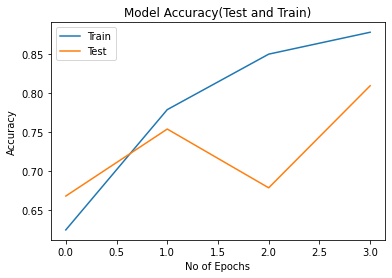

In [16]:
#Plotting Test vs Train Accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy(Test and Train)')
plt.ylabel('Accuracy')
plt.xlabel('No of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


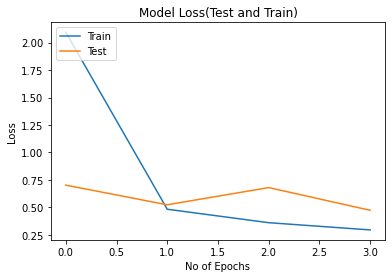

In [17]:
#Plotting Test vs Train Loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss(Test and Train)')
plt.ylabel('Loss')
plt.xlabel('No of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
